## **Import libraries**

In [12]:
import tensorflow as tf
from tensorflow import keras
import zipfile
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation, Input, Flatten, Rescaling,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import gdown


## **Download the dataset**

Download and extract the dataset from the below link in a folder.

https://drive.google.com/file/d/1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P/view?usp=sharing

In [3]:
gdown.download('https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P', 'dataset.zip', quiet=False)
with zipfile.ZipFile("dataset.zip", 'r') as zips:
    zips.extractall("dataset")

Downloading...
From: https://drive.google.com/uc?id=1SCpVEdJ6_YOAcy2iW05ENlMh-OCcFz3P
To: /content/dataset.zip
100%|██████████| 65.7M/65.7M [00:00<00:00, 117MB/s]


## **Read image files from directory**

To be familiar with keras dataset loading and preprocessing you can use the below link:

https://keras.io/api/preprocessing/image/

Please set ***validation_split = 0.2***

In [4]:
train_dt, test_dt = keras.preprocessing.image_dataset_from_directory("dataset",validation_split=0.2,subset="both",
seed=42,image_size=(256, 256),batch_size=32,)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Using 600 files for validation.


## **Display the dataset**

Plot some samples from the dataset to see and know what are you working with.

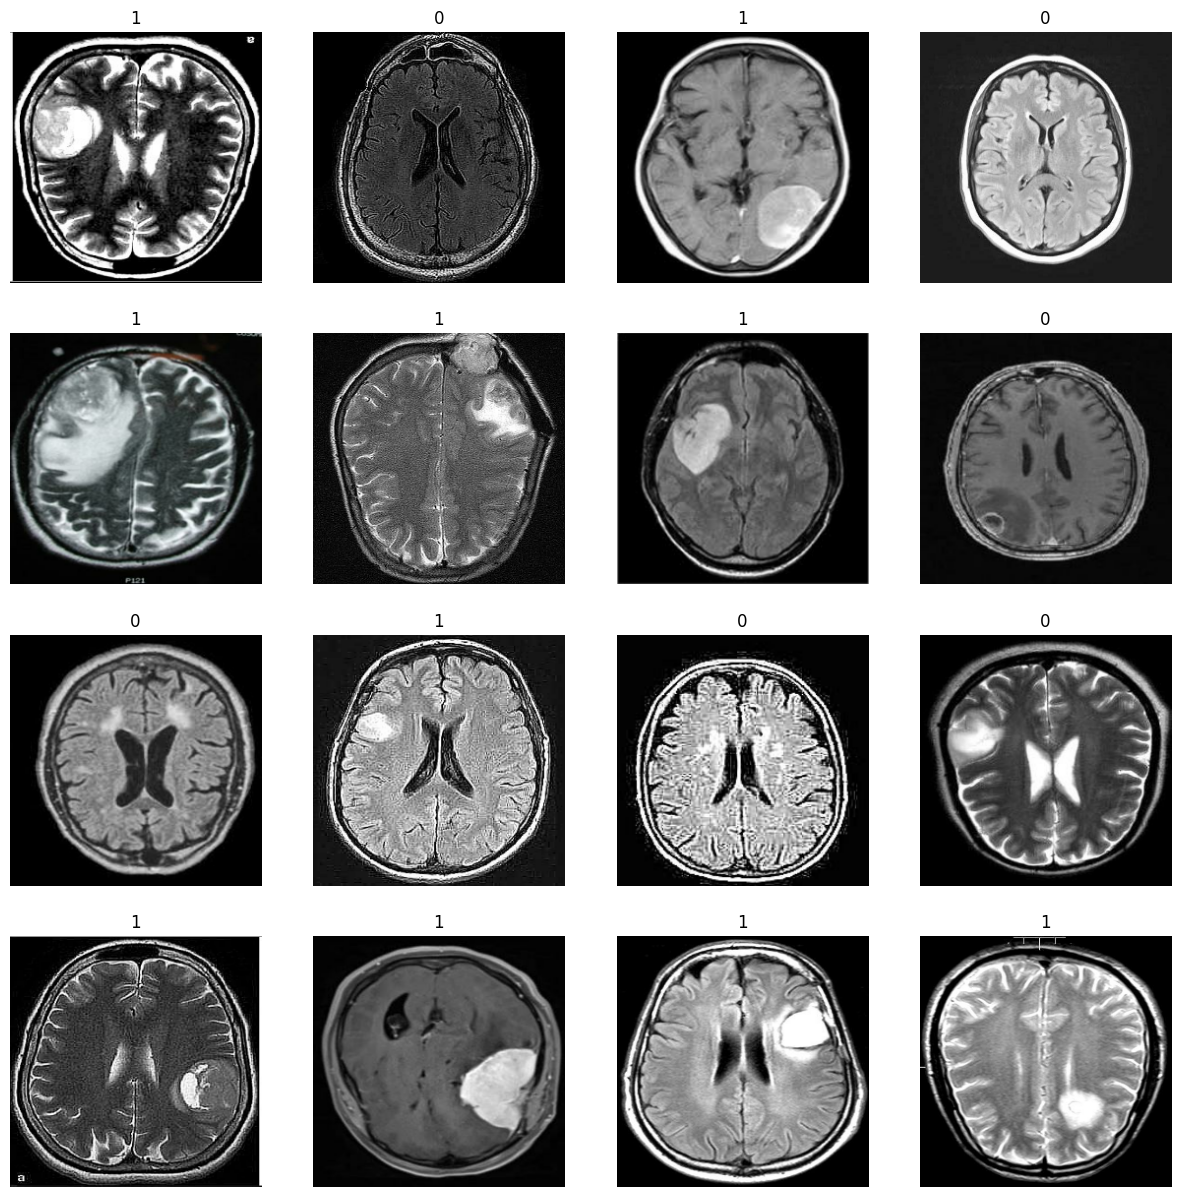

In [9]:
plt.figure(figsize=(15,15))
for img, lbl in train_dt.take(5):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(int(lbl[i]))
        plt.axis("off")

## **Build the models**

In this section you will build the model with two approaches.
First you should build it with the Sequential API and then you have to work with the Functional API in the second part.

You can use the below link to know more about these two APIs.

Keep the architecture as simple as possible.

https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10

## **1.Sequential API**

### **Build a model**

In [46]:
model = Sequential([
    Rescaling(1./255, input_shape=(256, 256, 3)),
    Conv2D(32, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

### **Train the model**

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_dt, epochs=15)

Epoch 1/15
75/75 [==============================] - 10s 91ms/step - loss: 0.6486 - accuracy: 0.8583
Epoch 2/15
75/75 [==============================] - 8s 98ms/step - loss: 0.5864 - accuracy: 0.8288
Epoch 3/15
75/75 [==============================] - 7s 96ms/step - loss: 0.3819 - accuracy: 0.8633
Epoch 4/15
75/75 [==============================] - 7s 90ms/step - loss: 0.3590 - accuracy: 0.8950
Epoch 5/15
75/75 [==============================] - 8s 97ms/step - loss: 0.2192 - accuracy: 0.9233
Epoch 6/15
75/75 [==============================] - 7s 90ms/step - loss: 0.4382 - accuracy: 0.8971
Epoch 7/15
75/75 [==============================] - 7s 95ms/step - loss: 0.4752 - accuracy: 0.8996
Epoch 8/15
75/75 [==============================] - 7s 90ms/step - loss: 0.3227 - accuracy: 0.8683
Epoch 9/15
75/75 [==============================] - 8s 96ms/step - loss: 0.2258 - accuracy: 0.9117
Epoch 10/15
75/75 [==============================] - 7s 94ms/step - loss: 0.2033 - accuracy: 0.9388
Epoch 11

### **Test the model**

In [50]:
model.evaluate(test_dt)

19/19 [==============================] - 1s 45ms/step - loss: 0.0691 - accuracy: 0.9817


[0.06907043606042862, 0.9816666841506958]

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

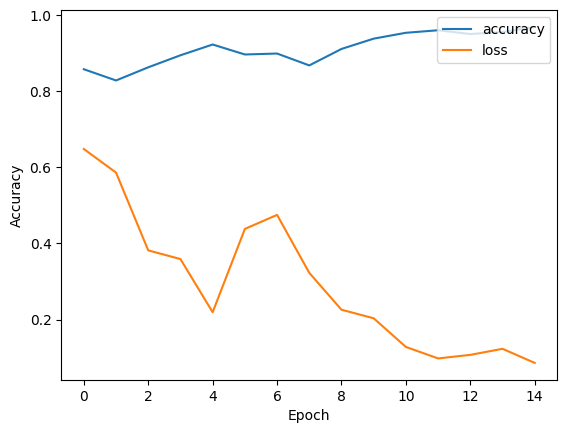

In [51]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

## **2.Functional API**

### **Build a model**

In [52]:
inputs = Input(shape=(256, 256, 3))
x = Rescaling(1./255)(inputs)
x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Conv2D(128, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

### **Train the model**

In [55]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dt, epochs=15)

Epoch 1/15
75/75 [==============================] - 11s 94ms/step - loss: 0.5761 - accuracy: 0.8213
Epoch 2/15
75/75 [==============================] - 7s 94ms/step - loss: 0.5950 - accuracy: 0.8146
Epoch 3/15
75/75 [==============================] - 7s 89ms/step - loss: 0.3817 - accuracy: 0.8496
Epoch 4/15
75/75 [==============================] - 7s 96ms/step - loss: 0.4014 - accuracy: 0.8767
Epoch 5/15
75/75 [==============================] - 7s 90ms/step - loss: 0.2710 - accuracy: 0.8850
Epoch 6/15
75/75 [==============================] - 8s 103ms/step - loss: 0.2915 - accuracy: 0.9017
Epoch 7/15
75/75 [==============================] - 7s 93ms/step - loss: 0.1751 - accuracy: 0.9250
Epoch 8/15
75/75 [==============================] - 7s 92ms/step - loss: 0.1860 - accuracy: 0.9296
Epoch 9/15
75/75 [==============================] - 8s 97ms/step - loss: 0.2079 - accuracy: 0.9337
Epoch 10/15
75/75 [==============================] - 7s 90ms/step - loss: 0.2395 - accuracy: 0.9250
Epoch 1

### **Test the model**

In [56]:
model.evaluate(test_dt)

19/19 [==============================] - 1s 47ms/step - loss: 0.1979 - accuracy: 0.9333


[0.19787029922008514, 0.9333333373069763]

### **Plot loss and accuracy**

In this part you should plot the loss and accuracy of train and test.

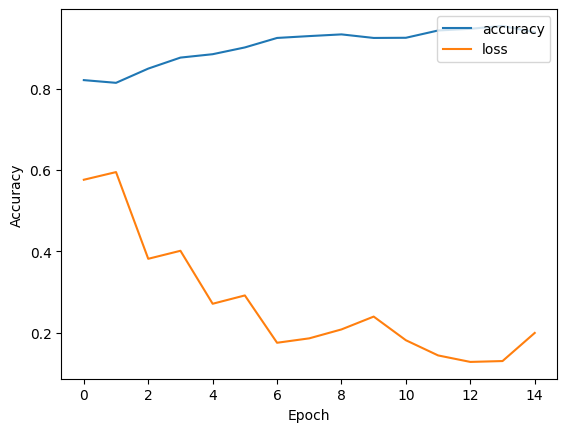

In [57]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()